In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

/home/rustam/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [122]:
def ce_grad(p):
    return -1 / p

def ce_loss(p):
    return -np.log(p)

In [197]:
def focal_grad(gamma, p):
    return gamma*np.power(1-p, gamma-1)*np.log(p) - np.power(1-p, gamma)/p

def focal_2grad(gamma, p):
    return np.power(1-p, gamma-2) * (gamma*(1-gamma)*np.log(p)+(1-p)*(2*p*gamma+1)/np.power(p, 2))

def focal_loss(gamma, p):
    return -np.power(1-p, gamma)*np.log(p)

In [327]:
def maki_grad(gamma, p):
    return -np.power(1-p, gamma)/p

def maki_2grad(gamma, p):
    return np.power(1-p, gamma-1)*(gamma*p+1)/np.power(p, 2)

def create_maki_polynom_part(gamma, k, p):
    binomial_coeff = binom(gamma, k)
    powered_p = (-1.0 * p)**k
    return binomial_coeff * powered_p / (1.0 * k)

def maki_loss(gamma, p):
    maki_pol = 0
    shift = 0
    for k in range(1, gamma+1):
        maki_pol -= create_maki_polynom_part(gamma, k, p) - create_maki_polynom_part(gamma, k, 1)
        #shift -= create_maki_polynom_part(gamma, k, 1)
        
    return maki_pol-np.log(p)

In [328]:
gamma = 2
p = np.linspace(0.01, 1.0, 100)
focal_grads = focal_grad(gamma, p)
maki_grads = maki_grad(gamma, p)
ce_grads = ce_grad(p)

In [329]:
focal_losses = focal_loss(gamma, p)
maki_losses = maki_loss(gamma, p)
ce_losses = ce_loss(p)

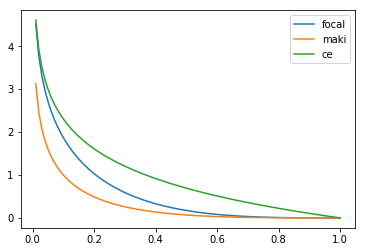

In [330]:
plt.plot(p, focal_losses, label='focal')
plt.plot(p, maki_losses, label='maki')
plt.plot(p, ce_losses, label='ce')
plt.legend()

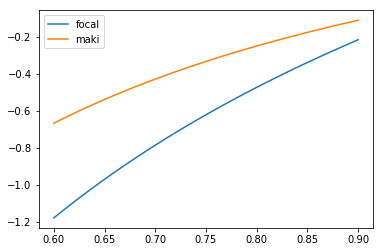

In [296]:
plt.plot(p, focal_grads, label='focal')
plt.plot(p, maki_grads, label='maki')
#plt.plot(p, ce_grads, label='ce')
plt.legend()

In [275]:
maki_2grads = maki_2grad(gamma, p)
focal_2grads = focal_2grad(gamma, p)

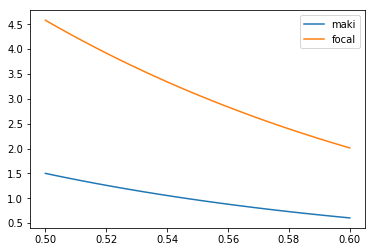

In [276]:
plt.plot(p, maki_2grads, label='maki')
plt.plot(p, focal_2grads, label='focal')
plt.legend()

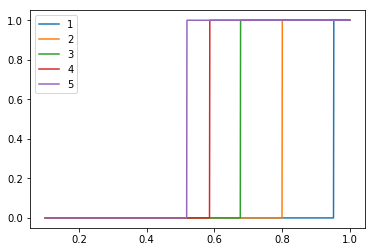

In [318]:
grads = []
for gamma_ in np.arange(1, 6):
    p_ = np.linspace(0.1, 1.0, 1000)
    maki_grads_ = maki_grad(gamma_, p_)
    grads += [maki_grads_]
    plt.plot(p_, np.float32(maki_grads_ > -0.05), label=f'{gamma_}')
plt.legend()